### Quick Start - MRI data visualization 

#### Import os module and specify the paths

In [1]:
import os  # system 
from os.path import join as opj


# Define subject and task identifiers
subject_id  = 'sub-MAS041020192'
task_id     = 'task-voiceopto'

# Define the working and subject directories 
workDir     = os.path.abspath(r'G:\MASCO_TD\MRI moduke\raw data\TP_MASCO')
subDir      = opj(workDir, subject_id)

anat        = opj(subDir, 'anat', f'{subject_id}_T1w.nii.gz')
epi_run1    = opj(subDir, 'func', f'{subject_id}_{task_id}_bold.nii.gz')

# Display the image paths
print(anat)
print(epi_run1)

G:\MASCO_TD\MRI moduke\raw data\TP_MASCO\sub-MAS041020192\anat\sub-MAS041020192_T1w.nii.gz
G:\MASCO_TD\MRI moduke\raw data\TP_MASCO\sub-MAS041020192\func\sub-MAS041020192_task-voiceopto_bold.nii.gz


#### Load an nifti image (T1w.nii) with NiBabel

In [2]:
import nibabel as nib

# Load the anatomical image ('T1w.nii')
img = nib.load(anat)

# Read header info
print(img.header)

# Get data
data = img.get_fdata()

# Get data shape in 3D planes
print(f'Shape: {data.shape}')

# Get data type. The data are in the form of a numpy array
print(f'Type: {type(data)}')


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 192 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  1.  1.  1.  2.3 0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=3;Time=100948.680;phase=1 is15'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.017728478
quatern_c       : -0.032245606
quatern_d       : 0.047980167
qoffset_x       : -78.56086
qoffset_y       : -109.29

#### Prior to visualize T1w, we need to rearrange the data

In [3]:
import numpy as np
data2 = np.rot90(data, 1)
print(data2.shape)

(256, 192, 256)


#### Plot the anatomical image  using NiBabel and matplotlib

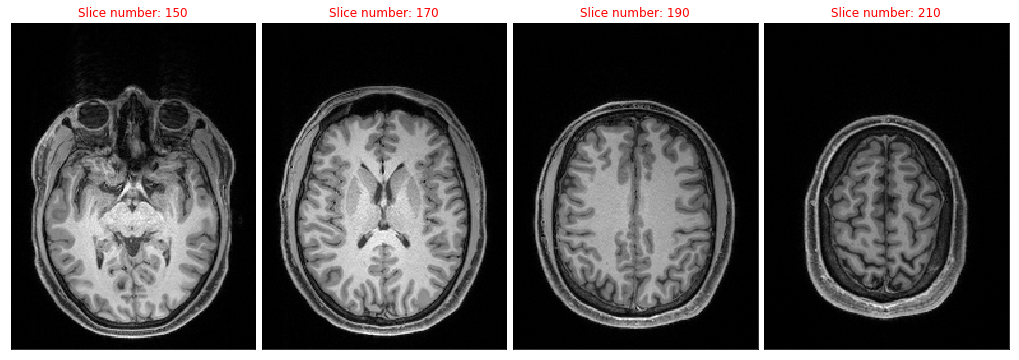

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Define a figure with a layout of 1 row and 5 colonnes 
figure, ax = plt.subplots(1, 4, figsize=[18, 6])

n = 0
sliceZ = 150
for im in range(4):
    ax[n].imshow(data2[:, :,sliceZ], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title(f'Slice number: {sliceZ}', color='r')
    n += 1
    sliceZ += 20
   
figure.subplots_adjust(wspace=0, hspace=0)
plt.show()

#### Load functional image with NiBabel

In [5]:
# Load the functional image
img_fun = nib.load(epi_run1)

# Read header info
#print(img_fun.header)

# Get data
data_fun = img_fun.get_fdata()

# Get data shape in 4D planes, last plane for volumes
print(f'Shape: {data_fun.shape}')

# Get data type. The data are in the form of a numpy array
print(f'Type: {type(data_fun)}')


Shape: (100, 100, 60, 792)
Type: <class 'numpy.ndarray'>


#### Plot the anatomical MRI image (T1w) using Nilearn

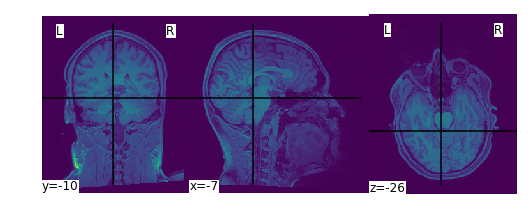

In [9]:
from nilearn import image
from nilearn.plotting import plot_img

plot_img(anat)

#### Plot the functional image using Nilearn

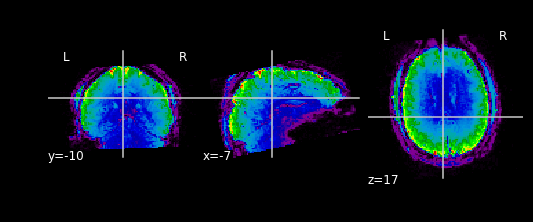

In [7]:
from nilearn import image
from nilearn.plotting import plot_epi

first_volume = image.index_img(epi_run1, 0)  
plot_epi(first_volume)

#### Plot voxel time course


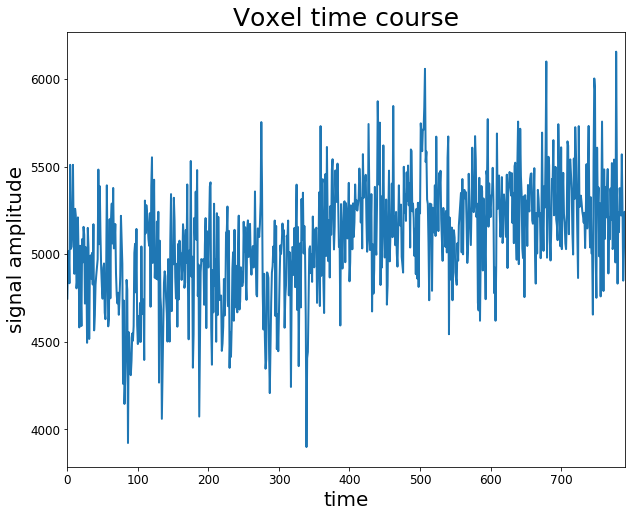

In [8]:
# Create a figure with 1 row and 1 column
figure, ax = plt.subplots(1, 1, figsize=[10, 8])

# Plot voxel timeseries
ax.plot(data_fun[50, 50, 30, :], lw=2)
ax.set_xlim([0, data_fun.shape[3]-1])
ax.set_xlabel('time', fontsize=20)
ax.set_ylabel('signal amplitude', fontsize=20)
ax.set_title('Voxel time course', fontsize=25)
ax.tick_params(labelsize=12)

plt.show()

                                                              updated by Valérie Chanoine on 3th, April 2020